In [1]:
#Image Agumentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
xtrain = train_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size=(64,64),class_mode='categorical',batch_size=100)

Found 4317 images belonging to 5 classes.


In [27]:
xtest = test_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size=(64,64),class_mode='categorical',batch_size=100)


Found 4317 images belonging to 5 classes.


In [29]:
#Create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [30]:
model = Sequential()

In [31]:
#Convolution layer
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [32]:
#maxpooling
model.add(MaxPooling2D(pool_size=(2,2)))

In [33]:
#Flatten
model.add(Flatten())

In [34]:
#Dense layer
model.add(Dense(300,activation='relu')) #hiddenlayer 1
model.add(Dense(300,activation='relu')) #hiddenlayer 2
model.add(Dense(150,activation='relu')) #hiddenlayer 3

In [35]:
#Output layer
model.add(Dense(5,activation='softmax'))

In [36]:
#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,                
                    validation_data=xtest,
                    validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
44/44 [==============================] - 535s 12s/step - loss: 1.4173 - accuracy: 0.3998 - val_loss: 1.2605 - val_accuracy: 0.4804
Epoch 2/10
44/44 [==============================] - 56s 1s/step - loss: 1.1266 - accuracy: 0.5319 - val_loss: 1.2064 - val_accuracy: 0.5038
Epoch 3/10
44/44 [==============================] - 56s 1s/step - loss: 1.0562 - accuracy: 0.5768 - val_loss: 1.0953 - val_accuracy: 0.5715
Epoch 4/10
44/44 [==============================] - 58s 1s/step - loss: 0.9895 - accuracy: 0.6067 - val_loss: 1.1026 - val_accuracy: 0.5654
Epoch 5/10
44/44 [==============================] - 56s 1s/step - loss: 0.9293 - accuracy: 0.6361 - val_loss: 1.0087 - val_accuracy: 0.6208
Epoch 6/10
44/44 [==============================] - 56s 1s/step - loss: 0.9001 - accuracy: 0.6463 - val_loss: 0.9558 - val_accuracy: 0.6315
Epoch 7/10
44/44 [==============================] - 58s 1s/step - loss: 0.8577 - accuracy: 0.6637 - val_loss: 0.9713 - val_accuracy: 0.6259
Epoch 8/10
44/44 [

In [39]:
#saving
model.save('Flowers.h5')

In [40]:
#Testing the model
import numpy as np
from tensorflow.keras.preprocessing import image


In [43]:
img = image.load_img(r"/content/drive/MyDrive/flowers/sunflower/3840761441_7c648abf4d_n.jpg",target_size=(64,64))

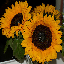

In [44]:
img

In [45]:
x = image.img_to_array(img)
x

array([[[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [ 67.,  39.,  27.],
        [ 62.,  31.,  26.],
        [ 63.,  63.,  61.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [ 66.,  38.,  26.],
        [ 64.,  35.,  29.],
        [ 76.,  78.,  75.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [ 63.,  35.,  24.],
        [ 62.,  35.,  28.],
        [ 71.,  71.,  69.]],

       ...,

       [[  7.,   7.,   5.],
        [ 10.,  10.,   8.],
        [ 22.,  12.,  10.],
        ...,
        [157., 156., 151.],
        [142., 147., 141.],
        [ 85.,  77.,  56.]],

       [[141., 153., 153.],
        [181., 208., 203.],
        [183., 194., 188.],
        ...,
        [157., 158., 152.],
        [161., 162., 154.],
        [153., 154., 146.]],

       [[189., 188., 184.],
        [159., 158., 153.],
        [147., 1

In [46]:
x = np.expand_dims(x,axis=0)
x

array([[[[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [ 67.,  39.,  27.],
         [ 62.,  31.,  26.],
         [ 63.,  63.,  61.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [ 66.,  38.,  26.],
         [ 64.,  35.,  29.],
         [ 76.,  78.,  75.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [ 63.,  35.,  24.],
         [ 62.,  35.,  28.],
         [ 71.,  71.,  69.]],

        ...,

        [[  7.,   7.,   5.],
         [ 10.,  10.,   8.],
         [ 22.,  12.,  10.],
         ...,
         [157., 156., 151.],
         [142., 147., 141.],
         [ 85.,  77.,  56.]],

        [[141., 153., 153.],
         [181., 208., 203.],
         [183., 194., 188.],
         ...,
         [157., 158., 152.],
         [161., 162., 154.],
         [153., 154., 146.]],

        [[189., 188., 184.],
       

In [47]:
model.predict(x)

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [48]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [49]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

'sunflower'